### <a name='0'></a>Import libraries

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.19.2'

### <a name='1'></a> Exercise 231
Import the _tensorflow_ library version 2.x.

In [2]:
import tensorflow as tf

tf.__version__

'2.4.0'

Load Fashion MNIST data using the _tensorflow_ library. Respectively, the training set (_X \ _train_, _y \ _train_) and the test set (_X \ _test_, _y \ _test_).

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### <a name='2'></a> Exercise 232 
Using the _matplotlib_ library display the image from the training set with index 40.

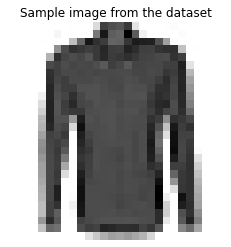

In [5]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[40],cmap='gray_r')
plt.title('Sample image from the dataset')
plt.axis('off')
plt.show()

Display the class number for the sample from the training set with index 40.

In [6]:
print(f'The class number of previous image is: {y_train[40]}')

The class number of previous image is: 6


### <a name='3'></a> Exercise 233
Standardize the data. Divide the values of the arrays _X \ _train_ and _X \ _test_ by the value 255.0.

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### <a name='4'></a> Exercise 234
Import the _Sequential_ class from the _tensorflow_ library using the _keras_ package.

In [8]:
from tensorflow.keras.models import Sequential

Import the _Flatten_ and _Dense_ layers from the _tensorflow_ library using the _keras_ package.

In [9]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### <a name='5'></a> Exercise 235
Create model of class _Sequential_.

In [10]:
model = Sequential()

Add the first layer of the _Flatten_ type along with the appropriately selected _input_shape_ parameter.

In [11]:
model.add(Flatten(input_shape=(28, 28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [12]:
model.add(Dense(units=128, activation='relu'))

Add the last layer of the _Dense_ type with 10 neurons and the _softmax_ activation function.

In [13]:
model.add(Dense(units=10, activation='softmax'))

View the model summary.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Exercise 236
Build the model. Use the _rmsprop_ optimizer, the _sparse_categorical_crossentropy_ loss function, and the _accuracy_ metric.

In [15]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Exercise 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6603 - accuracy: 0.7685 - val_loss: 0.4038 - val_accuracy: 0.8562
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8592 - val_loss: 0.3785 - val_accuracy: 0.8683
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3538 - accuracy: 0.8722 - val_loss: 0.3959 - val_accuracy: 0.8623
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.8789 - val_loss: 0.3882 - val_accuracy: 0.8679
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.8855 - val_loss: 0.3560 - val_accuracy: 0.8805
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8936 - val_loss: 0.3818 - val_accuracy: 0.8719
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8959 - val_loss: 0.3702 - val_accuracy:

### <a name='8'></a> Exercise 238
Make model predictions based on test data.

In [17]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

Build a confusion matrix (confusion matrix).

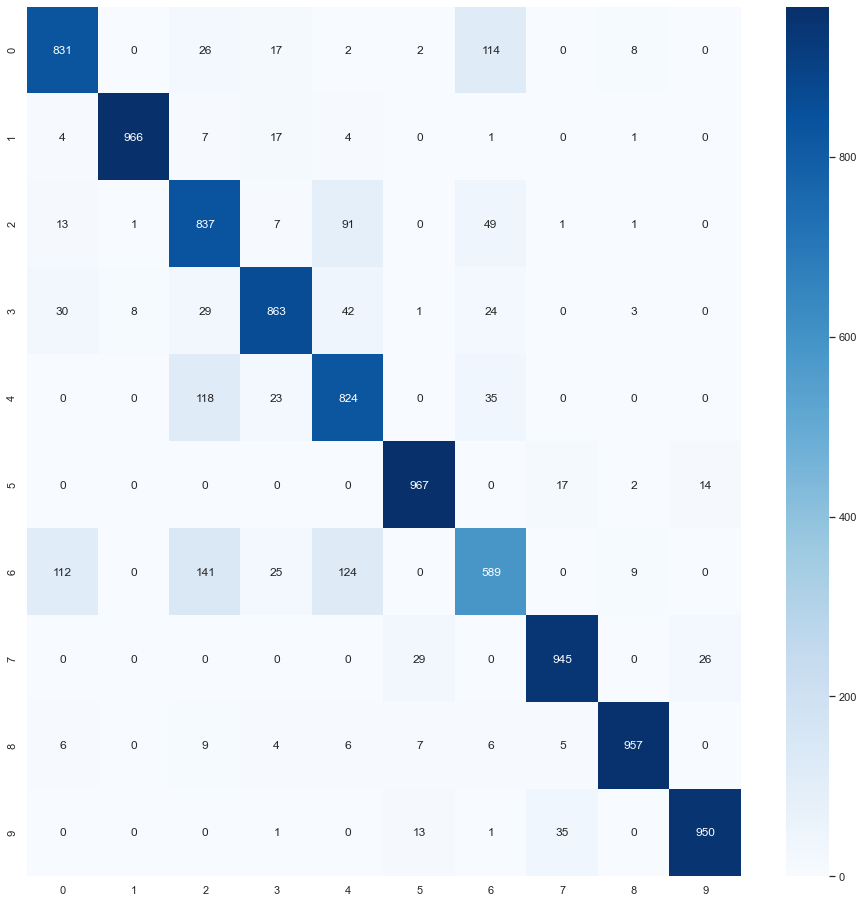

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

array = tf.math.confusion_matrix(
    y_test, y_pred, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None)
array = array.numpy()
df_cm = pd.DataFrame(array, range(array.shape[0]),range(array.shape[0]))

plt.figure(figsize = (16,16))

_ = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')


### <a name='9'></a> Exercise 239
Build the pandas _DataFrame_ object containing the model predictions. Name the column _prediction_ and assign it to the _results_ variable.

In [19]:
results = pd.DataFrame(data = y_pred,columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Assign a new column with the values in _y\_test_ and name it _y\_test_.

In [20]:
results['y_test'] =  y_test
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Assign a new column called _is_misclassified_ that will return 1 if the samples are misclassified, 0 otherwise.

In [21]:
results['is_misclassified'] = results.apply(lambda x : 1 if x['prediction'] != x['y_test'] else 0,axis = 1)

results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Exercise 240
Save the _results_ object to file _results.csv_.

In [22]:
results.to_csv('results.csv')